 ## Example for Data Processing (Part 2)

#### **TO DO**:
- Data visualization (3 levels)

[Interactive Widgets](https://ipython-books.github.io/33-mastering-widgets-in-the-jupyter-notebook/): [Widget List](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html) ; [Using Interact](https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html)

Filename:  C:/Users/JTavares/Documents/GitHub/Tese/2/data1-processed.csv


### Import CSV


In [3]:
import pandas as pd
import file
import os
import matplotlib.pyplot as plt

path = file.gui_fname()
path = path.decode('latin-1')
print("Filename: ", path)

df = pd.read_csv(path)

display(df.head())

Filename:  C:/Users/JTavares/Documents/GitHub/Tese/Tese/1. data/1 - data/Dados de defeito enviados 1 - processed.csv


,Processo_ P,Quant. Prod.,Caracteristica T,Caracteristica L,Comp.,Larg.,Espess.,Caracteristica A,T (ºC),%HR,month,year,week day,months,out_Quant. Prod.,out_Total c/Defeito
0,P2,98,TA,Hil,140,38,5.0,CONC,25.0,31.0,10,2020,3,0,98,0
1,P2,200,PE,Hil,38,38,5.0,ESVG,25.0,31.0,10,2020,3,0,200,0
2,P2,62,CO,Sto,70,30,5.0,CLVG,25.0,31.0,10,2020,3,0,62,0
3,P2,92,CO,Sto,70,30,5.0,CLVG,25.0,31.0,10,2020,3,0,92,0
4,P1,152,LA,Pom,224,34,3.0,NG,14.0,48.0,10,2020,4,0,152,5


In [4]:
df.rename(columns = {'out_Total c/Defeito': 'out_defects', 'out_Quant. Prod.':'out_Qtd.ordem'}, inplace = True)

df['Qtd.ordem'] = df.loc[:, 'out_Qtd.ordem']

---

### Select data to be observed
- Select features to be evaluated
- Select level of visualisation

In [5]:
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown


data = df.keys()
dtypes = df.dtypes
features = [out for out in data if "out_" not in out]
output = [out for out in data if "out_" in out]
checkboxes = [widgets.Checkbox(value=False, description=label) for label in features]
out_checkboxes = [widgets.Checkbox(value=False, description=label) for label in output]
out_options = [widgets.Dropdown(options=['sum', 'mean', 'max', 'min'], description='Aggregate options:') for x in output]
out_qt = widgets.ToggleButtons(options=output, description='Detected defects:', style = {'description_width': 'initial'})
butt = widgets.Button(description="OK", icon="check")


lst = [[], [], []] ; out_lst = [[], []]
for i in range(len(checkboxes)):
    lst[i%3].append(checkboxes[i])


tab1 = widgets.HBox([widgets.VBox(lst[0]), widgets.VBox(lst[1]), widgets.VBox(lst[2])])
tab2 = widgets.HBox([out_qt]) # widgets.VBox(out_lst[0]), widgets.VBox(out_lst[1]), out_qt])

outt = widgets.Output()
selected_features = []
selected_output = []

def on_check_clicked(b):
    with outt:
        clear_output()
        global selected_data
        global selected_output
        selected_data = []
        selected_output = []
        for i in range(0, len(checkboxes)):
            if checkboxes[i].value == True:
                selected_data = selected_data + [checkboxes[i].description]
#         for i in range(0, len(out_checkboxes)):
#             if out_checkboxes[i].value == True:
#                 selected_output[out_checkboxes[i].description] = out_options[i].value
        if output[0] != out_qt.value:
            selected_output = [out_qt.value, output[0]]
        else: 
            selected_output = output
            
        print("Selected data: ", selected_data)
        print("\nSelected output: ", selected_output)
        
        


tab = widgets.Tab(children=[tab1, tab2])
tab.set_title(0, 'Features')
tab.set_title(1, 'Output')
widgets.VBox(children=[tab])
        
butt.on_click(on_check_clicked)
display(tab, butt, outt)

Button(description='OK', icon='check', style=ButtonStyle())

Output()

In [10]:
selected_data =  ['Processo_ P', 'Quant. Prod.', 'Caracteristica T', 'Caracteristica L', 'Comp.', 'Qtd.ordem'
              'Larg.', 'Espess.', 'Caracteristica A', 'T (ºC)', '%HR', 'month', 'year', 'week day', 'months']
selected_output =  ['out_defects', 'out_Qtd.ordem']


display(df.head())
df.dtypes

,Processo_ P,Quant. Prod.,Caracteristica T,Caracteristica L,Comp.,Larg.,Espess.,Caracteristica A,T (ºC),%HR,month,year,week day,months,out_Qtd.ordem,out_defects,Qtd.ordem
0,P2,98,TA,Hil,140,38,5.0,CONC,25.0,31.0,10,2020,3,0,98,0,98
1,P2,200,PE,Hil,38,38,5.0,ESVG,25.0,31.0,10,2020,3,0,200,0,200
2,P2,62,CO,Sto,70,30,5.0,CLVG,25.0,31.0,10,2020,3,0,62,0,62
3,P2,92,CO,Sto,70,30,5.0,CLVG,25.0,31.0,10,2020,3,0,92,0,92
4,P1,152,LA,Pom,224,34,3.0,NG,14.0,48.0,10,2020,4,0,152,5,152


Processo_ P          object
Quant. Prod.          int64
Caracteristica T     object
Caracteristica L     object
Comp.                 int64
Larg.                 int64
Espess.             float64
Caracteristica A     object
T (ºC)              float64
%HR                 float64
month                 int64
year                  int64
week day              int64
months                int64
out_Qtd.ordem         int64
out_defects           int64
Qtd.ordem             int64
dtype: object

In [11]:
b = Bttns()

b.output_1D()

### Selection of 2 variables
- [seaborn.scatterplot](seaborn.pydata.org/generated/seaborn.scatterplot.html)

In [12]:
b = Bttns()

b.output_2D()

### Other analysis
Processo

df shape: (1068, 17)
df shape (defects): (137, 17)
percentage: 12.827715355805244




,Processo_ P,# prod. operations (total),# prod. operations with defect,% of prod. operations with defect,% of total prod. operations,% of total defective operations
0,P1,328,102,31.10,30.71,74.45
1,P2,740,35,4.73,69.29,25.55


---

sel ['# prod. operations (total)', '# prod. operations with defect']
object
[]
sel ['# prod. operations (total)', '# prod. operations with defect']


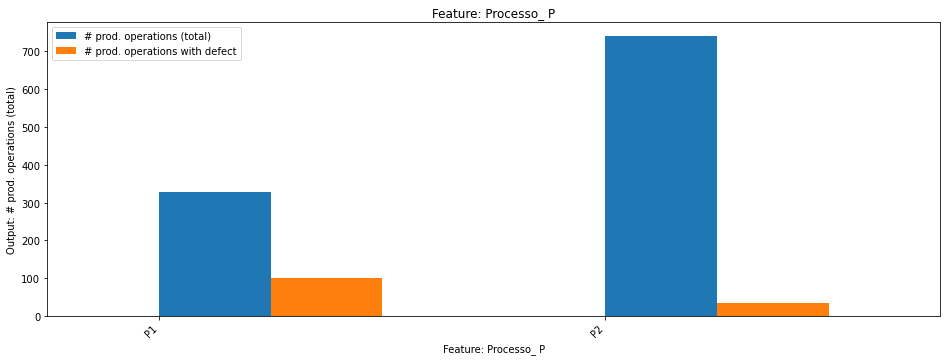

<AxesSubplot:ylabel='% of total prod. operations'>

<AxesSubplot:ylabel='% of total defective operations'>

,# de lotes com defeito
out_defects,
"(-2000, -1000]",0
"(-1000, -100]",0
"(-100, -30]",0
"(-30, -10]",0
"(-10, -1]",0
"(-1, 0]",931
"(0, 3]",45
"(3, 5]",23
"(5, 10]",28




Quantidade inicialmente prevista: 236829
Quantidade c/ defeito: 1377
Percentagem de defeito 0.5814321725802162


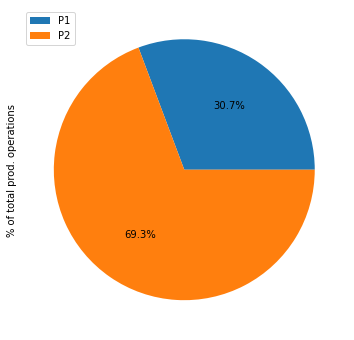

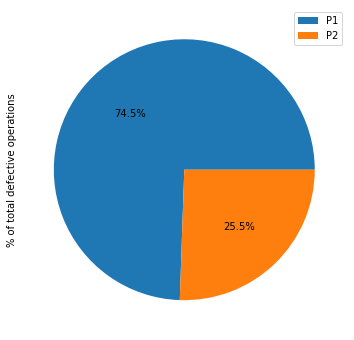

In [13]:
print("df shape:", df.shape)
print("df shape (defects):", df[df["out_defects"] > 0].shape)
print("percentage:", df[df["out_defects"] > 0].shape[0]/df.shape[0]*100)
print("\n")

# production orders (total)
s1 = df.groupby("Processo_ P")["Processo_ P"].count()

# production orders with defect
s2 = df[df["out_defects"] > 0].groupby("Processo_ P")["Processo_ P"].count()

# production orders with > 100 defects
s3 = df[df["out_defects"] > 100].groupby("Processo_ P")["Processo_ P"].count()

df2 = pd.DataFrame(dict(s1 = s1, s2 = s2)).reset_index()
df2["% of prod. operations with defect"] = df2["s2"]/df2["s1"]*100
df2["% of total prod. operations"] = df2["s1"]/df2["s1"].sum()*100
df2["% of total defective operations"] = df2["s2"]/df2["s2"].sum()*100
df2.rename(columns={"s1": "# prod. operations (total)","s2": "# prod. operations with defect"}, inplace=True)

pd.options.display.float_format = '{:.2f}'.format
display(df2)

show_graphic1D(df2,"Processo_ P", sel_output=["# prod. operations (total)","# prod. operations with defect"])

df2.set_index("Processo_ P", inplace=True)

plt1 = df2.plot(kind="pie",y="% of total prod. operations",labels=None,autopct='%1.1f%%')
plt2 = df2.plot(kind="pie",y="% of total defective operations",labels=None,autopct='%1.1f%%')

display(plt1,plt2)
# y="# prod. operations (total)"
# subplots=True

print("\n")
ranges = [-2000, -1000, -100, -30, -10, -1, 0, 3, 5,10,20,30,50,100,1000,10000]
df2 = df['out_defects'].groupby(pd.cut(df['out_defects'], ranges)).count().to_frame()
df2.rename(columns={"out_defects": "# de lotes com defeito"}, inplace=True)

display(df2)

print("\n")
print("Quantidade inicialmente prevista:", df["out_Qtd.ordem"].sum())
print("Quantidade c/ defeito:", df["out_defects"].sum())
print("Percentagem de defeito",df["out_defects"].sum()/df["out_Qtd.ordem"].sum()*100)

#### Months

,months,# prod. operations (total),# prod. operations with defect,# prod. operations with 100+ defects,% of prod. operations with defect,% of total prod. operations,% of total defective operations
0,0,102,12.00,NaN,11.76,9.55,8.76
1,1,139,16.00,NaN,11.51,13.01,11.68
2,2,81,11.00,NaN,13.58,7.58,8.03
3,3,127,13.00,NaN,10.24,11.89,9.49
4,4,156,24.00,NaN,15.38,14.61,17.52
5,5,125,23.00,NaN,18.40,11.70,16.79
6,6,102,12.00,NaN,11.76,9.55,8.76
7,7,99,9.00,NaN,9.09,9.27,6.57
8,8,69,10.00,NaN,14.49,6.46,7.30
9,9,10,1.00,NaN,10.00,0.94,0.73


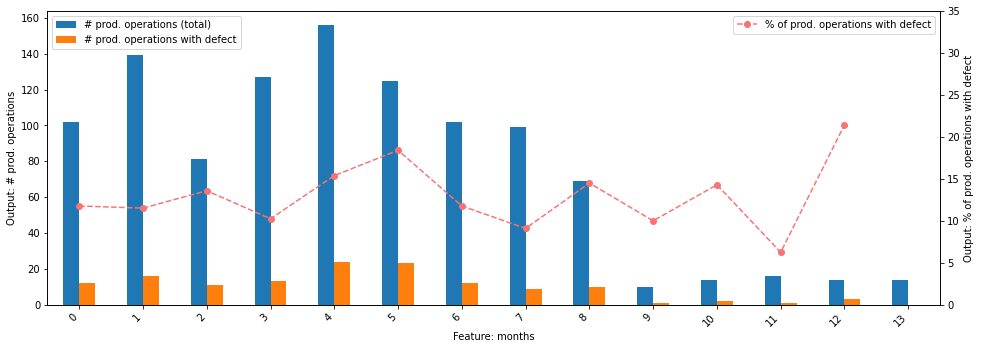

In [14]:
df4 = df.copy()

# production orders
s1 = df4.groupby("months")["months"].count()

# production orders with defect
s2 = df4[df4["out_defects"] > 0].groupby("months")["months"].count()

# production orders with > 100 defects
s3 = df4[df4["out_defects"] > 100].groupby("months")["months"].count()

df2 = pd.DataFrame(dict(s1 = s1, s2 = s2, s3=s3)).reset_index()

df2["% of prod. operations with defect"] = df2["s2"]/df2["s1"]*100
df2["% of total prod. operations"] = df2["s1"]/df2["s1"].sum()*100
df2["% of total defective operations"] = df2["s2"]/df2["s2"].sum()*100
df2.rename(columns={"s1": "# prod. operations (total)","s2": "# prod. operations with defect",
                    "s3": "# prod. operations with 100+ defects"}, inplace=True)

# month = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul",
#              8: "Aug", 9: "Sep", 10: "Out", 11: "Nov", 12: "Dec"}
# df2.replace({"Mês": month}, inplace=True)

pd.options.display.float_format = '{:.2f}'.format
# df2.set_index("Mês", inplace=True)

display(df2)

ax = df2.plot(x="months", y=["# prod. operations (total)","# prod. operations with defect"], kind='bar', align='center')

ax1 = ax.twinx()
df2.plot(ax=ax1, x="months", y="% of prod. operations with defect", style="o--",color="#F87474")
    
ax.set_xlabel(str('Feature: ' + "months"))
ax.figure.autofmt_xdate(rotation=45)
ax.legend(loc="upper left")
ax.set_ylabel(str('Output: # prod. operations'))
ax1.legend(loc="upper right")
ax1.set_ylabel(str('Output: % of prod. operations with defect'))
ax1.axis(ymin=0, ymax=35)

# save the figure
results_dir = 'Results/'
plt.savefig(results_dir + str('plot-months.png'))

#### T (ºC)

,Processo_ P,Quant. Prod.,Caracteristica T,Caracteristica L,Comp.,Larg.,Espess.,Caracteristica A,T (ºC),%HR,month,year,week day,months,out_Qtd.ordem,out_defects,Qtd.ordem
522,P2,84,T/B,Hil,45,35,5.00,CONC,51.00,51.00,3,2021,4,4,84,0,84


,T (ºC),# prod. operations (total),# prod. operations with defect,% of prod. operations with defect,% of total prod. operations,% of total defective operations
0,"(0, 10]",29,4,13.79,2.73,2.92
1,"(10, 15]",121,7,5.79,11.37,5.11
2,"(15, 20]",487,56,11.50,45.77,40.88
3,"(20, 25]",309,56,18.12,29.04,40.88
4,"(25, 30]",90,13,14.44,8.46,9.49
5,"(30, 40]",28,1,3.57,2.63,0.73


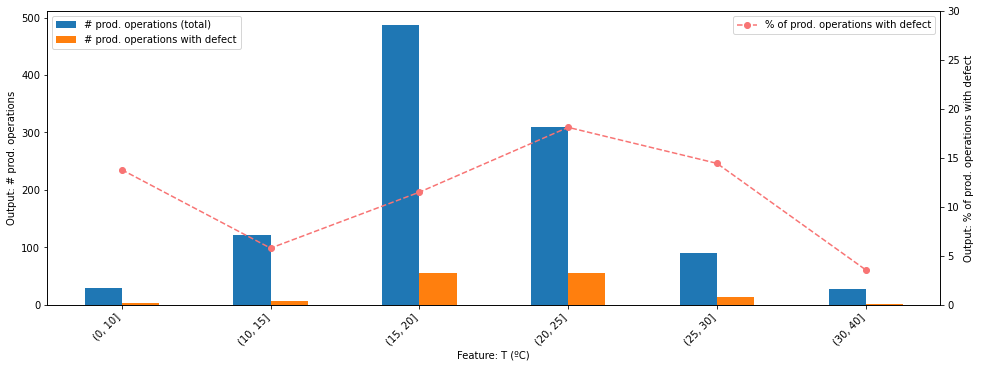

In [15]:
bins = [0,10,15,20,25,30,40]
df3 = df.copy()

display(df3[df3['T (ºC)']>40])

df3 = df3[df3['T (ºC)']<=40]

df3["bins"] = pd.cut(df3["T (ºC)"], bins=bins)

# production orders
s1 = df3.groupby("bins")["bins"].count()

# production orders with defect
s2 = df3[df3["out_defects"] > 0].groupby("bins")["bins"].count()

df2 = pd.DataFrame(dict(s1 = s1, s2 = s2)).reset_index()

df2["% of prod. operations with defect"] = df2["s2"]/df2["s1"]*100
df2["% of total prod. operations"] = df2["s1"]/df2["s1"].sum()*100
df2["% of total defective operations"] = df2["s2"]/df2["s2"].sum()*100
df2.rename(columns={"bins":"T (ºC)","s1": "# prod. operations (total)","s2": "# prod. operations with defect"}, inplace=True)

pd.options.display.float_format = '{:.2f}'.format
# df2.set_index("Mês", inplace=True)

display(df2)

ax = df2.plot(x="T (ºC)", y=["# prod. operations (total)","# prod. operations with defect"], kind='bar', align='center')

ax1 = ax.twinx()
df2.plot(ax=ax1, x="T (ºC)", y="% of prod. operations with defect", style="o--",color="#F87474")
    
ax.set_xlabel(str('Feature: ' + "T (ºC)"))
ax.figure.autofmt_xdate(rotation=45)
ax.legend(loc="upper left")
ax.set_ylabel(str('Output: # prod. operations'))
ax1.legend(loc="upper right")
ax1.set_ylabel(str('Output: % of prod. operations with defect'))
ax1.axis(ymin=0, ymax=30)

# save the figure
results_dir = 'Results/'
plt.savefig(results_dir + str('plot-T (ºC).png'))

#### Car1_1

In [16]:
df4 = df.copy()

# production orders
s1 = df4.groupby("car1_1")["car1_1"].count()

# production orders with defect
s2 = df4[df4["out_defects"] > 0].groupby("car1_1")["car1_1"].count()

# production orders with > 100 defects
s3 = df4[df4["out_defects"] > 100].groupby("car1_1")["car1_1"].count()

df2 = pd.DataFrame(dict(s1 = s1, s2 = s2, s3=s3)).reset_index()

df2["% of prod. operations with defect"] = df2["s2"]/df2["s1"]*100
df2["% of total prod. operations"] = df2["s1"]/df2["s1"].sum()*100
df2["% of total defective operations"] = df2["s2"]/df2["s2"].sum()*100
df2.rename(columns={"s1": "# prod. operations (total)","s2": "# prod. operations with defect",
                    "s3": "# prod. operations with 100+ defects"}, inplace=True)

# month = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul",
#              8: "Aug", 9: "Sep", 10: "Out", 11: "Nov", 12: "Dec"}
# df2.replace({"Mês": month}, inplace=True)

pd.options.display.float_format = '{:.2f}'.format
# df2.set_index("Mês", inplace=True)

display(df2)

ax = df2.plot(x="car1_1", y=["# prod. operations (total)","# prod. operations with defect"], kind='bar', align='center')

ax1 = ax.twinx()
df2.plot(ax=ax1, x="car1_1", y="% of prod. operations with defect", style="o--",color="#F87474")
    
ax.set_xlabel(str('Feature: ' + "car1_1"))
ax.figure.autofmt_xdate(rotation=45)
ax.legend(loc="upper left")
ax.set_ylabel(str('Output: # prod. operations'))
ax1.legend(loc="upper right")
ax1.set_ylabel(str('Output: % of prod. operations with defect'))
ax1.axis(ymin=0, ymax=65)

# save the figure
results_dir = 'Results/'
plt.savefig(results_dir + str('plot-car1_1.png'))

KeyError: 'car1_1'

#### Quantidade produzida

In [ ]:
bins = [0,100,200,300,400,500,600,700,800,900,1000,1500]

df3 = df.copy()
# display(df3[df3["Qtd.ordem"] > 1500])
print(df3["Qtd.ordem"].max(),df3["Qtd.ordem"].min(),df3.shape,df3[df3["Qtd.ordem"] <= 10000].shape,
      df3[df3["Qtd.ordem"] <= 1500].shape[0]/df3.shape[0]*100)

df3 = df3[df3["out_Qtd.ordem"] <= 1500]
df3["bins"] = pd.cut(df3["Qtd.ordem"], bins=bins)

# production orders
s1 = df3.groupby("bins")["bins"].count()

# production orders with defect
s2 = df3[df3["out_defects"] > 0].groupby("bins")["bins"].count()

# production orders with > 100 defects
s3 = df3[df3["out_defects"] > 100].groupby("bins")["bins"].count()

df2 = pd.DataFrame(dict(s1 = s1, s2 = s2)).reset_index()

df2["% of prod. operations with defect"] = df2["s2"]/df2["s1"]*100
df2["% of total prod. operations"] = df2["s1"]/df2["s1"].sum()*100
df2["% of total defective operations"] = df2["s2"]/df2["s2"].sum()*100
df2.rename(columns={"bins":"Qtd.ordem","s1": "# prod. operations (total)","s2": "# prod. operations with defect"}, inplace=True)

pd.options.display.float_format = '{:.2f}'.format
display(df2)

ax = df2.plot(x="Qtd.ordem", y=["# prod. operations (total)","# prod. operations with defect"], kind='bar', align='center')

ax1 = ax.twinx()
df2.plot(ax=ax1, x="Qtd.ordem", y="% of prod. operations with defect", style="o--",color="#F87474")
    
ax.set_xlabel(str('Feature: ' + "Qtd.ordem"))
ax.figure.autofmt_xdate(rotation=45)
ax.legend(loc="upper left")
ax.set_ylabel(str('Output: # prod. operations'))
ax1.legend(loc="upper right")
ax1.set_ylabel(str('Output: % of prod. operations with defect'))
ax1.axis(ymin=0, ymax=40)

# save the figure
results_dir = 'Results/'
plt.savefig(results_dir + str('plot-Qtd.ordem.png'))


df2.set_index("Qtd.ordem", inplace=True)

#### Mês

In [ ]:
df4 = df.copy()

# production orders
s1 = df4.groupby("Mês")["Mês"].count()

# production orders with defect
s2 = df4[df4["out_defects"] > 0].groupby("Mês")["Mês"].count()

# production orders with > 100 defects
s3 = df4[df4["out_defects"] > 100].groupby("Mês")["Mês"].count()

df2 = pd.DataFrame(dict(s1 = s1, s2 = s2, s3=s3)).reset_index()

df2["% of prod. operations with defect"] = df2["s2"]/df2["s1"]*100
df2["% of total prod. operations"] = df2["s1"]/df2["s1"].sum()*100
df2["% of total defective operations"] = df2["s2"]/df2["s2"].sum()*100
df2.rename(columns={"s1": "# prod. operations (total)","s2": "# prod. operations with defect",
                    "s3": "# prod. operations with 100+ defects"}, inplace=True)

month = {1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun", 7: "Jul",
             8: "Aug", 9: "Sep", 10: "Out", 11: "Nov", 12: "Dec"}
df2.replace({"Mês": month}, inplace=True)

pd.options.display.float_format = '{:.2f}'.format
# df2.set_index("Mês", inplace=True)

display(df2)

ax = df2.plot(x="Mês", y=["# prod. operations (total)","# prod. operations with defect"], kind='bar', align='center')

ax1 = ax.twinx()
df2.plot(ax=ax1, x="Mês", y="% of prod. operations with defect", style="o--",color="#F87474")
    
ax.set_xlabel(str('Feature: ' + "Month"))
ax.figure.autofmt_xdate(rotation=45)
ax.legend(loc="upper left")
ax.set_ylabel(str('Output: # prod. operations'))
ax1.legend(loc="upper right")
ax1.set_ylabel(str('Output: % of prod. operations with defect'))
ax1.axis(ymin=25, ymax=60)

# save the figure
results_dir = 'Results/'
plt.savefig(results_dir + str('plot-Mês.png'))

#### N operações

In [17]:
df4 = df.copy()

# production orders
s1 = df4.groupby("n_operations")["n_operations"].count()

# production orders with defect
s2 = df4[df4["out_defects"] > 0].groupby("n_operations")["n_operations"].count()

# production orders with > 100 defects
s3 = df4[df4["out_defects"] > 100].groupby("n_operations")["n_operations"].count()

df2 = pd.DataFrame(dict(s1 = s1, s2 = s2, s3=s3)).reset_index()

df2 = df2[df2["n_operations"] < 5]

df2["% of prod. operations with defect"] = df2["s2"]/df2["s1"]*100
df2["% of total prod. operations"] = df2["s1"]/df2["s1"].sum()*100
df2["% of total defective operations"] = df2["s2"]/df2["s2"].sum()*100
df2.rename(columns={"s1": "# prod. operations (total)","s2": "# prod. operations with defect",
                    "s3": "# prod. operations with 100+ defects"}, inplace=True)

n_operations = {1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7"}
df2.replace({"n_operations": n_operations}, inplace=True)

pd.options.display.float_format = '{:.2f}'.format
# df2.set_index("Mês", inplace=True)

display(df2)

ax = df2.plot(x="n_operations", y=["# prod. operations (total)","# prod. operations with defect"], kind='bar', align='center')

ax1 = ax.twinx()
df2.plot(ax=ax1, x="n_operations", y="% of prod. operations with defect", style="o--",color="#F87474")
    
ax.set_xlabel(str('Feature: ' + "n_operations"))
ax.figure.autofmt_xdate(rotation=45)
ax.legend(loc="upper left")
ax.set_ylabel(str('Output: # prod. operations'))
ax1.legend(loc="upper right")
ax1.set_ylabel(str('Output: % of prod. operations with defect'))
ax1.axis(ymin=15, ymax=60)

# save the figure
results_dir = 'Results/'
plt.savefig(results_dir + str('plot-n_operations.png'))

KeyError: 'n_operations'

#### Dia da semana

In [18]:
df4 = df.copy()

df4 = df4[df4["week_day"] != 6]

# production orders
s1 = df4.groupby("week_day")["week_day"].count()

# production orders with defect
s2 = df4[df4["out_defects"] > 0].groupby("week_day")["week_day"].count()

# production orders with > 100 defects
s3 = df4[df4["out_defects"] > 100].groupby("week_day")["week_day"].count()

df2 = pd.DataFrame(dict(s1 = s1, s2 = s2, s3=s3)).reset_index()

df2["% of prod. operations with defect"] = df2["s2"]/df2["s1"]*100
df2["% of total prod. operations"] = df2["s1"]/df2["s1"].sum()*100
df2["% of total defective operations"] = df2["s2"]/df2["s2"].sum()*100
df2.rename(columns={"s1": "# prod. operations (total)","s2": "# prod. operations with defect",
                    "s3": "# prod. operations with 100+ defects"}, inplace=True)

week_days = {0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday", 4: "Friday", 5: "Saturday", 6: "Sunday"}
df2.replace({"week_day": week_days}, inplace=True)



pd.options.display.float_format = '{:.2f}'.format
# df2.set_index("Mês", inplace=True)

display(df2)

ax = df2.plot(x="week_day", y=["# prod. operations (total)","# prod. operations with defect"], kind='bar', align='center')

ax1 = ax.twinx()
df2.plot(ax=ax1, x="week_day", y="% of prod. operations with defect", style="o--",color="#F87474")
    
ax.set_xlabel(str('Feature: ' + "week_day"))
ax.figure.autofmt_xdate(rotation=45)
ax.legend(loc="upper left")
ax.set_ylabel(str('Output: # prod. operations'))
ax1.legend(loc="upper right")
ax1.set_ylabel(str('Output: % of prod. operations with defect'))
ax1.axis(ymin=25, ymax=60)

# save the figure
results_dir = 'Results/'
plt.savefig(results_dir + str('plot-week_day.png'))

KeyError: 'week_day'

#### Características

,Caracteristica A,# prod. operations (total),# prod. operations with defect,# prod. operations with 100+ defects,% of prod. operations with defect,% of total prod. operations,% of total defective operations
0,CAR,96,17.00,NaN,17.71,9.01,12.41
1,CC,5,2.00,NaN,40.00,0.47,1.46
2,CCA,2,NaN,NaN,NaN,0.19,NaN
3,CE,44,1.00,NaN,2.27,4.13,0.73
4,CL/PL,55,19.00,NaN,34.55,5.16,13.87
5,CLAB,31,4.00,NaN,12.90,2.91,2.92
6,CLVG,240,28.00,NaN,11.67,22.51,20.44
7,CLVG/PL,16,2.00,NaN,12.50,1.50,1.46
8,CONC,241,5.00,NaN,2.07,22.61,3.65
9,CONC/ESVG,1,NaN,NaN,NaN,0.09,NaN


,Caracteristica T,# prod. operations (total),# prod. operations with defect,# prod. operations with 100+ defects,% of prod. operations with defect,% of total prod. operations,% of total defective operations
0,B/T,29,2.00,NaN,6.90,2.72,1.46
1,BA,82,12.00,NaN,14.63,7.68,8.76
2,CA,20,6.00,NaN,30.00,1.87,4.38
3,CO,8,NaN,NaN,NaN,0.75,NaN
4,DI,109,20.00,NaN,18.35,10.21,14.60
5,EX,2,NaN,NaN,NaN,0.19,NaN
6,FR,9,NaN,NaN,NaN,0.84,NaN
7,FR/GA,3,NaN,NaN,NaN,0.28,NaN
8,LA,197,33.00,NaN,16.75,18.45,24.09
9,P,3,NaN,NaN,NaN,0.28,NaN


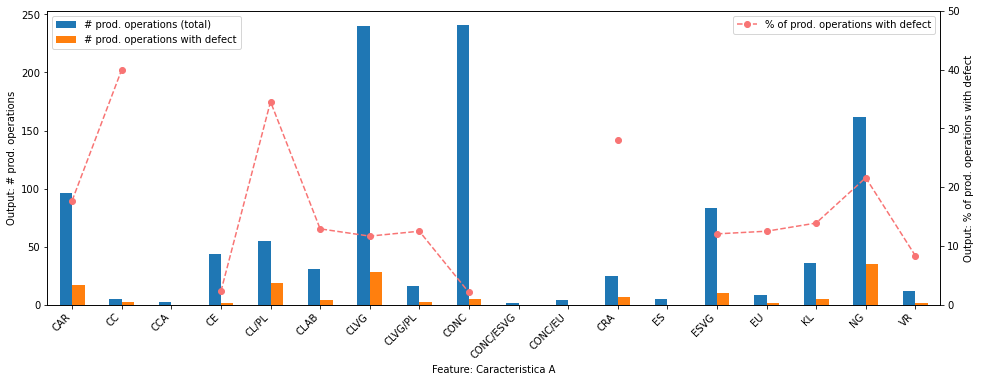

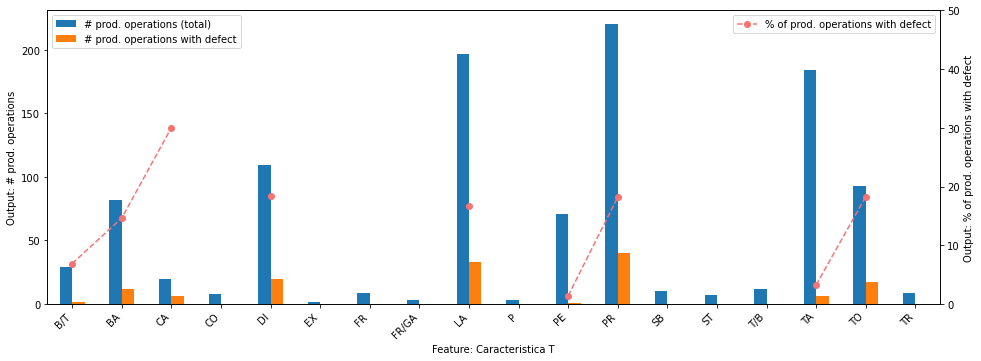

In [23]:
df4 = df.copy()

for icar in ["Caracteristica A", "Caracteristica T"]:

    # production orders
    s1 = df4.groupby(icar)[icar].count()

    # production orders with defect
    s2 = df4[df4["out_defects"] > 0].groupby(icar)[icar].count()

    # production orders with > 100 defects
    s3 = df4[df4["out_defects"] > 100].groupby(icar)[icar].count()

    df2 = pd.DataFrame(dict(s1 = s1, s2 = s2, s3=s3)).reset_index()

    df2["% of prod. operations with defect"] = df2["s2"]/df2["s1"]*100
    df2["% of total prod. operations"] = df2["s1"]/df2["s1"].sum()*100
    df2["% of total defective operations"] = df2["s2"]/df2["s2"].sum()*100
    df2.rename(columns={"s1": "# prod. operations (total)","s2": "# prod. operations with defect",
                        "s3": "# prod. operations with 100+ defects"}, inplace=True)


    pd.options.display.float_format = '{:.2f}'.format

    display(df2)

    ax = df2.plot(x=icar, y=["# prod. operations (total)","# prod. operations with defect"], kind='bar', align='center')

    ax1 = ax.twinx()
    df2.plot(ax=ax1, x=icar, y="% of prod. operations with defect", style="o--",color="#F87474")

    ax.set_xlabel(str('Feature: ' + icar))
    ax.figure.autofmt_xdate(rotation=45)
    ax.legend(loc="upper left")
    ax.set_ylabel(str('Output: # prod. operations'))
    ax1.legend(loc="upper right")
    ax1.set_ylabel(str('Output: % of prod. operations with defect'))
    ax1.axis(ymin=0, ymax=50)

    # save the figure
    results_dir = 'Results/'
    plt.savefig(results_dir + str('plot-'+icar+'.png'))

#### Dimensions

,n_operations,# prod. operations (total),# prod. operations with defect,# prod. operations with 100+ defects,% of prod. operations with defect,% of total prod. operations,% of total defective operations
0,1,9622,5143,1294.00,53.45,36.64,42.97
1,2,8282,4037,464.00,48.74,31.54,33.73
2,3,6265,2230,234.00,35.59,23.86,18.63
3,4,2091,559,48.00,26.73,7.96,4.67


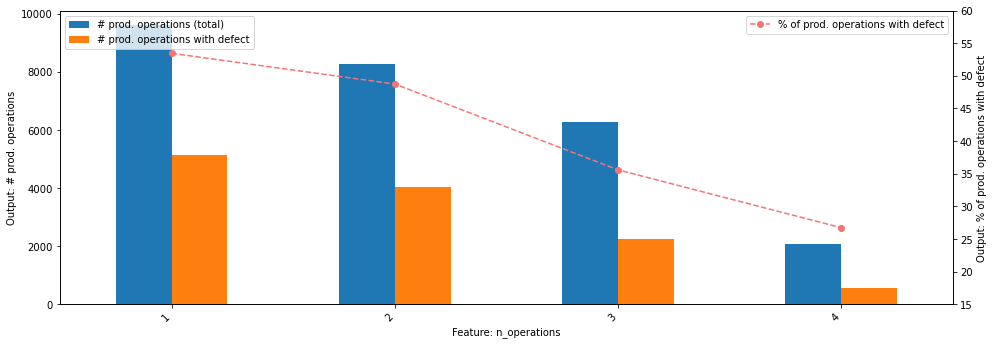

In [35]:
df4 = df.copy()

# production orders
s1 = df4.groupby("n_operations")["n_operations"].count()

# production orders with defect
s2 = df4[df4["out_defects"] > 0].groupby("n_operations")["n_operations"].count()

# production orders with > 100 defects
s3 = df4[df4["out_defects"] > 100].groupby("n_operations")["n_operations"].count()

df2 = pd.DataFrame(dict(s1 = s1, s2 = s2, s3=s3)).reset_index()

df2 = df2[df2["n_operations"] < 5]

df2["% of prod. operations with defect"] = df2["s2"]/df2["s1"]*100
df2["% of total prod. operations"] = df2["s1"]/df2["s1"].sum()*100
df2["% of total defective operations"] = df2["s2"]/df2["s2"].sum()*100
df2.rename(columns={"s1": "# prod. operations (total)","s2": "# prod. operations with defect",
                    "s3": "# prod. operations with 100+ defects"}, inplace=True)

n_operations = {1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7"}
df2.replace({"n_operations": n_operations}, inplace=True)

pd.options.display.float_format = '{:.2f}'.format
# df2.set_index("Mês", inplace=True)

display(df2)

ax = df2.plot(x="n_operations", y=["# prod. operations (total)","# prod. operations with defect"], kind='bar', align='center')

ax1 = ax.twinx()
df2.plot(ax=ax1, x="n_operations", y="% of prod. operations with defect", style="o--",color="#F87474")
    
ax.set_xlabel(str('Feature: ' + "n_operations"))
ax.figure.autofmt_xdate(rotation=45)
ax.legend(loc="upper left")
ax.set_ylabel(str('Output: # prod. operations'))
ax1.legend(loc="upper right")
ax1.set_ylabel(str('Output: % of prod. operations with defect'))
ax1.axis(ymin=15, ymax=60)

# save the figure
results_dir = 'Results/'
plt.savefig(results_dir + str('plot-n_operations.png'))

## Gráfico 2D

### Caracteristicas A e T

,Caracteristica T,Caracteristica A,# prod. operations (total),# prod. operations with defect,# prod. operations with 100+ defects,% of prod. operations with defect,% of total prod. operations,% of total defective operations
0,B/T,CAR,2,NaN,NaN,NaN,0.19,NaN
1,B/T,CLVG,14,NaN,NaN,NaN,1.31,NaN
2,B/T,ESVG,1,NaN,NaN,NaN,0.09,NaN
3,B/T,NG,12,2.00,NaN,16.67,1.13,1.46
4,BA,CAR,10,2.00,NaN,20.00,0.94,1.46
...,...,...,...,...,...,...,...,...
95,TO,KL,6,1.00,NaN,16.67,0.56,0.73
96,TO,NG,8,4.00,NaN,50.00,0.75,2.92
97,TO,VR,2,NaN,NaN,NaN,0.19,NaN
98,TR,CE,1,NaN,NaN,NaN,0.09,NaN


---

##### Feature: Caracteristica T + Caracteristica A

,Caracteristica T,Caracteristica A,out_defects,out_Qtd.ordem,percentage
0,B/T,NG,22,354,6.21
1,BA,CAR,13,564,2.30
2,BA,CL/PL,9,516,1.74
3,BA,CLAB,1,2,50.00
4,BA,CLVG,8,140,5.71
5,BA,CLVG/PL,1,101,0.99
6,BA,CONC,3,50,6.00
7,BA,ESVG,11,128,8.59
8,BA,KL,2,244,0.82
9,BA,NG,5,302,1.66


Output:  percentage


---

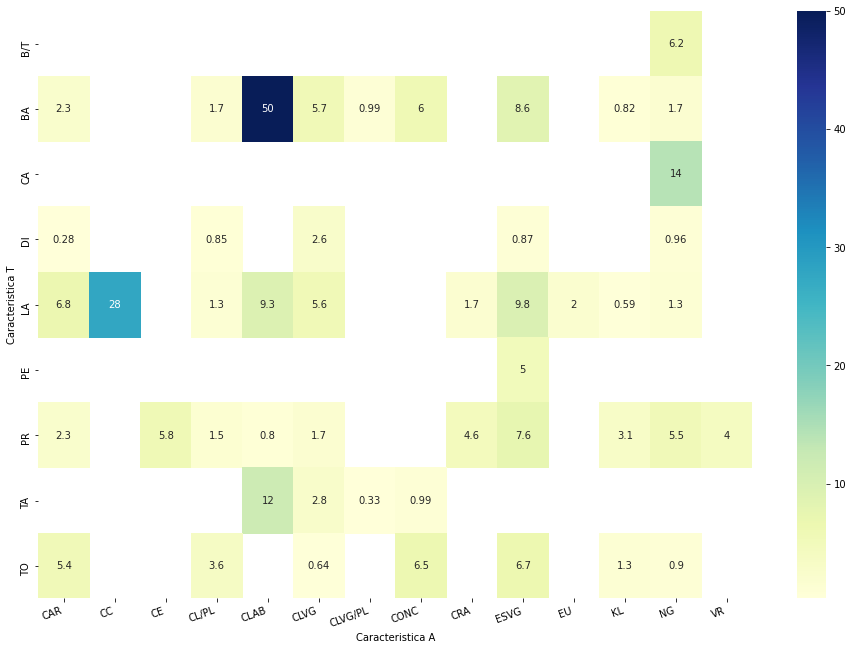

In [34]:
df4 = df.copy()

data_2D = ["Caracteristica T","Caracteristica A"] # "Tipo de operação","Difference","Qtd.ordem"

# production orders
s1 = df4.groupby(data_2D)[data_2D[0]].count()

# production orders with defect
s2 = df4[df4["out_defects"] > 0].groupby(data_2D)[data_2D[0]].count()

# production orders with > 100 defects
s3 = df4[df4["out_defects"] > 100].groupby(data_2D)[data_2D[0]].count()

df2 = pd.DataFrame(dict(s1 = s1, s2 = s2, s3=s3)).reset_index()


df2["% of prod. operations with defect"] = df2["s2"]/df2["s1"]*100
df2["% of total prod. operations"] = df2["s1"]/df2["s1"].sum()*100
df2["% of total defective operations"] = df2["s2"]/df2["s2"].sum()*100
df2.rename(columns={"s1": "# prod. operations (total)","s2": "# prod. operations with defect",
                    "s3": "# prod. operations with 100+ defects"}, inplace=True)

n_operations = {1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7"}
df2.replace({"n_operations": n_operations}, inplace=True)

pd.options.display.float_format = '{:.2f}'.format
# df2.set_index("Mês", inplace=True)

display(df2)

#heatmap

df3 = df.copy()
df3 = df3[df3["out_defects"] > 0]

# df.dtypes
df3 = show_table(data_2D, bins=True, nbins=10, dfnew=df3)

show_graphic2D(df3, data_2D, "percentage")
# show_graphic2D(df3, data_2D, "out_defects")


# ax = df2.plot(x="n_operations", y=["# prod. operations (total)","# prod. operations with defect"], kind='bar', align='center')

# ax1 = ax.twinx()
# df2.plot(ax=ax1, x="n_operations", y="% of prod. operations with defect", style="o--",color="#F87474")
    
# ax.set_xlabel(str('Feature: ' + "n_operations"))
# ax.figure.autofmt_xdate(rotation=45)
# ax.legend(loc="upper left")
# ax.set_ylabel(str('Output: # prod. operations'))
# ax1.legend(loc="upper right")
# ax1.set_ylabel(str('Output: % of prod. operations with defect'))
# ax1.axis(ymin=15, ymax=60)

# # save the figure
# results_dir = 'Results/'
# plt.savefig(results_dir + str('plot-n_operations.png'))

### Humidade e temperatura

,T (ºC),%HR,# prod. operations (total),# prod. operations with defect,# prod. operations with 100+ defects,% of prod. operations with defect,% of total prod. operations,% of total defective operations
0,5.00,40.00,1,1.00,NaN,100.00,0.09,0.73
1,6.00,49.00,1,NaN,NaN,NaN,0.09,NaN
2,7.00,44.00,1,NaN,NaN,NaN,0.09,NaN
3,7.00,45.00,1,NaN,NaN,NaN,0.09,NaN
4,7.00,46.00,3,2.00,NaN,66.67,0.28,1.46
...,...,...,...,...,...,...,...,...
393,33.00,20.00,2,NaN,NaN,NaN,0.19,NaN
394,34.00,20.00,2,NaN,NaN,NaN,0.19,NaN
395,35.00,21.00,1,NaN,NaN,NaN,0.09,NaN
396,35.00,28.00,1,NaN,NaN,NaN,0.09,NaN


0 float64
1 float64


---

##### Feature: T (ºC) + %HR

,T (ºC),%HR,out_defects,out_Qtd.ordem,percentage
0,"(4.969, 10.167]","(36.333, 44.5]",18,998,1.80
1,"(4.969, 10.167]","(44.5, 52.667]",45,3768,1.19
2,"(4.969, 10.167]","(52.667, 60.833]",0,1636,0.00
3,"(10.167, 15.333]","(36.333, 44.5]",0,2270,0.00
4,"(10.167, 15.333]","(44.5, 52.667]",109,7965,1.37
5,"(10.167, 15.333]","(52.667, 60.833]",4,5679,0.07
6,"(10.167, 15.333]","(60.833, 69.0]",30,2319,1.29
7,"(15.333, 20.5]","(19.951, 28.167]",44,1439,3.06
8,"(15.333, 20.5]","(28.167, 36.333]",0,3322,0.00
9,"(15.333, 20.5]","(36.333, 44.5]",70,15889,0.44


Output:  percentage


---

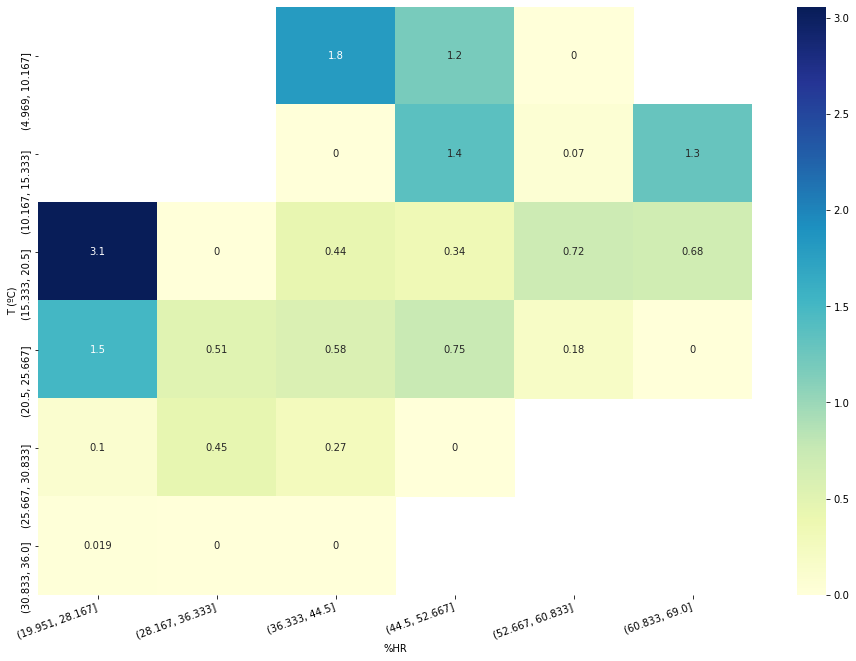

In [64]:
data_2D = ["T (ºC)","%HR"]

# production orders
s1 = df4.groupby(data_2D)[data_2D[0]].count()

# production orders with defect
s2 = df4[df4["out_defects"] > 0].groupby(data_2D)[data_2D[0]].count()

# production orders with > 100 defects
s3 = df4[df4["out_defects"] > 100].groupby(data_2D)[data_2D[0]].count()

df2 = pd.DataFrame(dict(s1 = s1, s2 = s2, s3=s3)).reset_index()


df2["% of prod. operations with defect"] = df2["s2"]/df2["s1"]*100
df2["% of total prod. operations"] = df2["s1"]/df2["s1"].sum()*100
df2["% of total defective operations"] = df2["s2"]/df2["s2"].sum()*100
df2.rename(columns={"s1": "# prod. operations (total)","s2": "# prod. operations with defect",
                    "s3": "# prod. operations with 100+ defects"}, inplace=True)

n_operations = {1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7"}
df2.replace({"n_operations": n_operations}, inplace=True)

pd.options.display.float_format = '{:.2f}'.format
# df2.set_index("Mês", inplace=True)

display(df2)

#heatmap

df3 = df.copy()

bins = [0,10,15,20,25,30,40,50,60]
df3 = df3[df3["T (ºC)"] <= 40]
# df3["bins"] = pd.cut(df3["T (ºC)"], bins=bins)
# display(df3)
# df3.rename(columns={"bins":"T (ºC)"}, inplace=True)
# # df3["bins"] = pd.cut(df3["%HR"], bins=bins)
# # df3.rename(columns={"bins":"%HR"}, inplace=True)


# df.dtypes
df3 = show_table(data_2D, bins=True, nbins=6, dfnew=df3)

show_graphic2D(df3, data_2D, "percentage")
# show_graphic2D(df3, data_2D, "out_defects")


# ax = df2.plot(x="n_operations", y=["# prod. operations (total)","# prod. operations with defect"], kind='bar', align='center')

# ax1 = ax.twinx()
# df2.plot(ax=ax1, x="n_operations", y="% of prod. operations with defect", style="o--",color="#F87474")
    
# ax.set_xlabel(str('Feature: ' + "n_operations"))
# ax.figure.autofmt_xdate(rotation=45)
# ax.legend(loc="upper left")
# ax.set_ylabel(str('Output: # prod. operations'))
# ax1.legend(loc="upper right")
# ax1.set_ylabel(str('Output: % of prod. operations with defect'))
# ax1.axis(ymin=15, ymax=60)

# # save the figure
# results_dir = 'Results/'
# plt.savefig(results_dir + str('plot-n_operations.png'))

### Dimensões

,Larg.,Espess.,# prod. operations (total),# prod. operations with defect,# prod. operations with 100+ defects,% of prod. operations with defect,% of total prod. operations,% of total defective operations
0,8,5.00,4,NaN,NaN,NaN,0.37,NaN
1,13,5.00,1,NaN,NaN,NaN,0.09,NaN
2,13,7.00,9,NaN,NaN,NaN,0.84,NaN
3,20,5.00,5,NaN,NaN,NaN,0.47,NaN
4,22,5.00,29,1.00,NaN,3.45,2.72,0.73
...,...,...,...,...,...,...,...,...
58,90,5.50,2,NaN,NaN,NaN,0.19,NaN
59,90,8.00,10,2.00,NaN,20.00,0.94,1.46
60,100,5.00,13,NaN,NaN,NaN,1.22,NaN
61,123,5.00,3,NaN,NaN,NaN,0.28,NaN


---

##### Feature: Larg. + Espess.

,Larg.,Espess.,out_defects,out_Qtd.ordem,percentage
0,22,5.00,7,100,7.00
1,28,4.00,4,300,1.33
2,29,4.00,35,1749,2.00
3,30,3.00,147,903,16.28
4,34,3.00,260,7291,3.57
5,34,3.80,745,38066,1.96
6,34,4.00,42,681,6.17
7,38,3.00,1,101,0.99
8,39,3.00,2,102,1.96
9,40,8.00,3,50,6.00


Output:  percentage


---

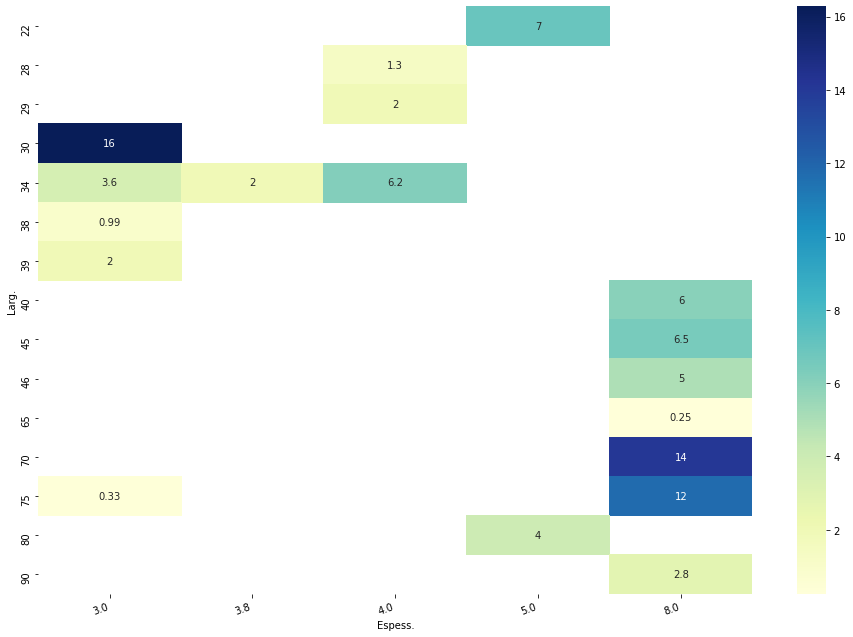

In [32]:
df4 = df.copy()

data_2D = ["Larg.","Espess."] # Larg. , Comp. , Espess.

# production orders
s1 = df4.groupby(data_2D)[data_2D[0]].count()

# production orders with defect
s2 = df4[df4["out_defects"] > 0].groupby(data_2D)[data_2D[0]].count()

# production orders with > 100 defects
s3 = df4[df4["out_defects"] > 100].groupby(data_2D)[data_2D[0]].count()

df2 = pd.DataFrame(dict(s1 = s1, s2 = s2, s3=s3)).reset_index()


df2["% of prod. operations with defect"] = df2["s2"]/df2["s1"]*100
df2["% of total prod. operations"] = df2["s1"]/df2["s1"].sum()*100
df2["% of total defective operations"] = df2["s2"]/df2["s2"].sum()*100
df2.rename(columns={"s1": "# prod. operations (total)","s2": "# prod. operations with defect",
                    "s3": "# prod. operations with 100+ defects"}, inplace=True)

n_operations = {1: "1", 2: "2", 3: "3", 4: "4", 5: "5", 6: "6", 7: "7"}
df2.replace({"n_operations": n_operations}, inplace=True)

pd.options.display.float_format = '{:.2f}'.format
# df2.set_index("Mês", inplace=True)

display(df2)

#heatmap

df3 = df.copy()
df3 = df3[df3["out_defects"] > 0]

# df.dtypes
df3 = show_table(data_2D, bins=False, nbins=15, dfnew=df3)

show_graphic2D(df3, data_2D, "percentage")
# show_graphic2D(df3, data_2D, "out_defects")


# ax = df2.plot(x="n_operations", y=["# prod. operations (total)","# prod. operations with defect"], kind='bar', align='center')

# ax1 = ax.twinx()
# df2.plot(ax=ax1, x="n_operations", y="% of prod. operations with defect", style="o--",color="#F87474")
    
# ax.set_xlabel(str('Feature: ' + "n_operations"))
# ax.figure.autofmt_xdate(rotation=45)
# ax.legend(loc="upper left")
# ax.set_ylabel(str('Output: # prod. operations'))
# ax1.legend(loc="upper right")
# ax1.set_ylabel(str('Output: % of prod. operations with defect'))
# ax1.axis(ymin=15, ymax=60)

# # save the figure
# results_dir = 'Results/'
# plt.savefig(results_dir + str('plot-n_operations.png'))

---

## Backup

In [8]:
import ipywidgets as widgets
from IPython.display import display, clear_output, Markdown
    
class Bttns:
    import ipywidgets as widgets
    from IPython.display import display, clear_output, Markdown
    
    def __init__(self):
        
        # --------------------- 1D --------------------- 
        
        # creating menu with them
        self.dropdown = self.widgets.Dropdown(options=selected_data, description="Feature: ")
        self.out_dropdown = self.widgets.Dropdown(options=selected_output)

        # button, output, function and linkage
        self.butt1 = self.widgets.Button(description='Table', tooltip='table1D')
        self.butt2 = self.widgets.Button(description='Graphic', tooltip='graphic1D')
        self.filter_butt = self.widgets.Button(description='Filter', icon="filter", tooltip='1D')
        self.options_butt = self.widgets.Button(description='Options', icon="ellipsis-v", tooltip='1D')
        self.output_butt = self.widgets.Button(description='Output', icon="arrow-right", tooltip='1D')
        self.o_options = out_checkboxes
        self.multiple = self.widgets.SelectMultiple()
        self.b_options = list(range(1, 21)) ; self.b_options.append("auto")
        self.nbins = self.widgets.Dropdown(value = "auto", options=self.b_options, description="number of bins")
        self.bins = self.widgets.Checkbox(value=True, description="Bins")
        self.percent = self.widgets.Checkbox(value=False, description="percentage")
        self.vpercent = self.widgets.ToggleButtons(options=["Absolute", "Relative"], description="Percentage")
        self.min_check = self.widgets.Checkbox(value=False, description="Interval of values")
        self.min_value = self.widgets.IntRangeSlider()

        self.outt1 = self.widgets.Output() ; self.outt2 = self.widgets.Output() ; self.outt3 = self.widgets.Output()


        self.butt1.on_click(self.on_butt_clicked1)
        self.butt2.on_click(self.on_butt_clicked2)
        self.output_butt.on_click(self.output_butt_clicked)
        self.filter_butt.on_click(self.filter_butt_clicked)
        self.options_butt.on_click(self.options_butt_clicked)

        self.tab1 = self.widgets.VBox()
        self.tab1_1 = self.widgets.HBox([self.output_butt, self.filter_butt, self.options_butt])
        self.tab1.children = [self.tab1_1, self.widgets.HBox([self.outt2, self.outt3])]
        
        # --------------------- 2D --------------------- 
        
        # creating menu with them   
        self.dropdown2_1 = self.widgets.Dropdown(
            options=selected_data, description="Feature 1: ")
        self.dropdown2_2 = self.widgets.Dropdown(
            options=selected_data, description="Feature 2: ")
        self.out_dropdown2 = self.widgets.Dropdown(options=selected_output)

        # button, output, function and linkage
        self.butt2_1 = self.widgets.Button(description='Table', tooltip='table2D')
        self.butt2_2 = self.widgets.Button(description='Graphic', tooltip='graphic2D')

        self.filter_butt2 = self.widgets.Button(description='Filter', icon="filter", tooltip='2D')
        self.options_butt2 = self.widgets.Button(description='Options', icon="ellipsis-v", tooltip='2D')
        self.output_butt2 = self.widgets.Button(description='Output', icon="arrow-right", tooltip='2D')
        self.o_options2 = out_checkboxes
        self.multiple2 = self.widgets.SelectMultiple()
        self.nbins2 = self.widgets.Dropdown(value = "auto", options=self.b_options, description="number of bins", tooltip='2D')
        self.bins2 = self.widgets.Checkbox(value=True, description="Bins", tooltip='2D')
        self.percent2 = self.widgets.Checkbox(value=False, description="percentage", tooltip='2D')
        self.vpercent2 = self.widgets.ToggleButtons(options=["Absolute", "Relative"], description="Percentage", tooltip='2D')
        self.min_check2 = self.widgets.Checkbox(value=False, description="Interval of values", tooltip='2D')
        self.min_value2 = self.widgets.IntRangeSlider()

        self.outt2_1 = self.widgets.Output() ; self.outt2_2 = self.widgets.Output() ; self.outt2_3 = self.widgets.Output()


        self.butt2_1.on_click(self.on_butt_clicked1)
        self.butt2_2.on_click(self.on_butt_clicked2)
        self.output_butt2.on_click(self.output_butt_clicked)
        self.filter_butt2.on_click(self.filter_butt_clicked)
        self.options_butt2.on_click(self.options_butt_clicked)

        self.tab2 = self.widgets.VBox()
        self.tab2_1 = self.widgets.HBox([self.output_butt2, self.filter_butt2, self.options_butt2])
        self.tab2.children = [self.tab2_1, self.widgets.HBox([self.outt2_2, self.outt2_3])]
        
        

    def output_1D(self):
        # display
        display(self.widgets.VBox([self.dropdown, self.widgets.VBox(children=[self.tab1]),
                    self.widgets.HBox([self.butt1, self.butt2]), self.outt1]))
        
    def output_2D(self):
        # display
        display(self.widgets.VBox([self.widgets.HBox([self.dropdown2_1, self.dropdown2_2]),
                              self.widgets.VBox(children=[self.tab2]),
                              self.widgets.HBox([self.butt2_1, self.butt2_2]), self.outt2_1]))

        
    def filter_butt_clicked(self, b):
        if "1D" in b.tooltip:
            self.tab1.layout = self.widgets.Layout(border="solid gray 2px")
            with self.outt3:
                clear_output()
            with self.outt2:
                clear_output()
                d = str(self.dropdown.value)
                display(Markdown('Select value to be evaluated:'))
                s = selected_data.copy()
                s.remove(d) ; s.append("None")
                self.widgets.interact(self.filter_butt_clicked1, x=s);
        elif "2D" in b.tooltip:
            self.tab2.layout = self.widgets.Layout(border="solid gray 2px")
            with self.outt2_3:
                clear_output()
            with self.outt2_2:
                clear_output()
                d1 = str(self.dropdown2_1.value) ; d2 = str(self.dropdown2_2.value)
                if d1 == d2:
                    display(Markdown("Choose diferent variables!"))
                else:
                    display(Markdown('Select value to be evaluated:'))
                    s = selected_data.copy()
                    s.remove(d1) ; s.remove(d2) ; s.append("None")
                    self.widgets.interact(self.filter_butt_clicked2, x=s);


    def options_butt_clicked(self, b):
        if "1D" in b.tooltip:
            self.tab1.layout = self.widgets.Layout(border="solid gray 2px")
            with self.outt3:
                clear_output()
            with self.outt2:
                clear_output()
                display(Markdown('More options:'))
                w = self.widgets.interactive(self.options_butt_clicked1, x=self.percent, y=self.min_check, z=self.bins)
                display(self.widgets.VBox([w]))
        elif "2D" in b.tooltip:
            self.tab2.layout = self.widgets.Layout(border="solid gray 2px")
            with self.outt2_3:
                clear_output()
            with self.outt2_2:
                clear_output()
                display(Markdown('More options:'))
                w = self.widgets.interactive(self.options_butt_clicked2, x=self.percent2, y=self.min_check2, z=self.bins2)
                display(w)


    def output_butt_clicked(self, b):
        if "1D" in b.tooltip:
            self.tab1.layout = self.widgets.Layout(border="solid gray 2px")
            with self.outt3:
                clear_output()
            with self.outt2:
                clear_output()
                display(Markdown('Output options:'))
                self.o_options = []
                for i in range(0, len(selected_output)):
                    w = self.widgets.Checkbox(value=True, description=out_checkboxes[i].description)
                    self.o_options.append(w)
                if(self.o_options[-1].description != "percentage"):
                    self.o_options.append(self.percent)
                display(self.widgets.VBox(self.o_options))
        elif "2D" in b.tooltip:
            self.tab1.layout = self.widgets.Layout(border="solid gray 2px")
            with self.outt2_3:
                clear_output()
            with self.outt2_2:
                clear_output()
                display(Markdown('Output options:'))
                w = []
                w = selected_output.copy() ;
                w.append('percentage')
                print(w)
                self.o_options2 = self.widgets.RadioButtons(options=w, value='percentage')
                display(self.o_options2)


    def on_butt_clicked1(self, b):
        if "1D" in b.tooltip:
            with self.outt1:
                clear_output()
                d = str(self.dropdown.value)
                if self.multiple == -1:
                    mvalue = () ; desc=""
                else:
                    mvalue = self.multiple.value ; desc = self.multiple.description
                b = self.bins.value ; nb = self.nbins.value
                ichk = self.min_check.value ; iv = self.min_value.value ; ivar = str(self.out_dropdown.value)
                show_table(d, desc, mvalue, bins=b, nbins=nb, int_check=ichk, int_var= ivar, int_value=iv)
        elif "2D" in b.tooltip:
            with self.outt2_1:
                clear_output()
                d1 = str(self.dropdown2_1.value) ; d2 = str(self.dropdown2_2.value) ; lst12 = [d1, d2]
                b = self.bins2.value ; nb = self.nbins2.value
                if self.multiple2 == -1:
                    mvalue=() ; desc=""
                else:
                    mvalue = self.multiple2.value ; desc = self.multiple2.description
                ichk = self.min_check2.value ; iv = self.min_value2.value ; ivar = str(self.out_dropdown2.value)
                print(mvalue)
                if d1 == d2: print("Choose diferent variables!")
                else: show_table(lst12, desc, mvalue, bins=b, nbins=nb, int_check=ichk, int_var= ivar, int_value=iv)


    def on_butt_clicked2(self, b):
        if "1D" in b.tooltip:
            with self.outt1:
                d = str(self.dropdown.value) ; out = self.o_options
                if self.multiple == -1:
                    mvalue = () ; desc=""
                else:
                    mvalue = self.multiple.value ; desc = self.multiple.description
                b = self.bins.value ; nb = self.nbins.value
                ichk = self.min_check.value ; iv = self.min_value.value ; ivar = str(self.out_dropdown.value)
                df2 = show_table(d, desc, mvalue, disp=False, bins=b, nbins=nb, int_check=ichk, int_var= ivar, int_value=iv)
                clear_output()
                show_graphic1D(df2, d, out, desc, mvalue,sel_output=[])
        elif "2D" in b.tooltip:
            with self.outt2_1:
                clear_output()
                d1 = str(self.dropdown2_1.value) ; d2 = str(self.dropdown2_2.value)
                out = str(self.out_dropdown2.value) ; lst12 = [d1, d2]
                if d1 == d2: print("Choose diferent variables!")
                else:
                    b = self.bins2.value ; nb = self.nbins2.value
                    if self.multiple2 == -1:
                        mvalue = () ; desc=""
                    else:
                        mvalue = self.multiple2.value ; desc = self.multiple2.description
                    ichk = self.min_check2.value ; iv = self.min_value2.value ; ivar = str(self.out_dropdown2.value)
                    df2 = show_table(lst12, desc, mvalue, disp=False, bins=b, nbins=nb, int_check=ichk, int_var= ivar, int_value=iv)
                    clear_output()
                    print(desc, mvalue)
                    try:
                        show_graphic2D(df2, lst12, output=self.o_options2.value)
                    except:
                        print('Choose the output of the graphic')


    def options_butt_clicked1(self, x, y, z):
        with self.outt3:
            clear_output()

            d = str(self.dropdown.value) ; b = self.bins.value
            df1 = show_table(d, bins=b, disp=False)

            global min_value
            min_value = self.widgets.IntRangeSlider(min=df1[self.out_dropdown.value].min(),
                                                    max=df1[self.out_dropdown.value].max())
            self.vpercent.disabled = not x ; self.min_value.disabled = not y ; self.nbins.disabled = not z

            display(self.vpercent, self.widgets.HBox([self.out_dropdown, self.min_value]), self.nbins)


    def options_butt_clicked2(self, x, y, z):
        with self.outt2_3:
            clear_output()

            d1 = str(self.dropdown2_1.value) ; d2 = str(self.dropdown2_2.value) ; b = self.bins2.value
            lst12 = [d1, d2]
            if d1 == d2: print("Choose diferent variables!")
            else:
                df1 = show_table(lst12, bins=b, disp=False)

                global min_value2
                min_value2 = self.widgets.IntRangeSlider(min=df1[self.out_dropdown2.value].min(),
                                                         max=df1[self.out_dropdown2.value].max())
                self.vpercent2.disabled = not x ; self.min_value2.disabled = not y ; self.nbins2.disabled = not z

                display(self.vpercent2, self.widgets.HBox([self.out_dropdown2, self.min_value2]), self.nbins2)


    def filter_butt_clicked1(self, x):
        with self.outt3:
            clear_output()
            if x == "None":
                self.multiple = -1
            else:
                options=df[x].unique()
                self.multiple = self.widgets.SelectMultiple(options=options, description=x, disabled=False)
                display(self.multiple)

            
    def filter_butt_clicked2(self, x):
        with self.outt2_3:
            clear_output()
            if x == "None":
                self.multiple2 = -1
            else:
                options=df[x].unique()
                self.multiple2 = self.widgets.SelectMultiple(options=options, description=x, disabled=False)
                display(self.multiple2)


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

rcParams["figure.figsize"] = (16,6)

typedata = {"object": "bar", "float64": "bar", "category": "bar", "int64": "bar"}


def show_table(d, desc="", mvalue=(), disp=True, bins=False, nbins='auto', int_check=False, int_var= "", int_value=[], dfnew=pd.DataFrame()):
    
    global selected_output
    output_options = {selected_output[0]: 'sum', selected_output[1]: 'sum'}
    
    if len(mvalue) != 0:
        df1 = df[df[desc].isin(mvalue)]
        if isinstance(d, str):
            title = "##### Feature: " + d + " for " + desc + "=" + str(mvalue)
        elif isinstance(d, list):
            title = str("##### Feature: " + d[0] + " + " + d[1] + " for " + desc + "=" + str(mvalue))
    else: 
        df1 = df
        if isinstance(d, str):
            title = str("##### Feature: " + d)
        elif isinstance(d, list):
            title = str("##### Feature: " + d[0] + " + " + d[1])
    
    if not(dfnew.empty):
        df1 = dfnew
    
    if int_check:
        df1 = df1[df1[int_var] >= int_value[0]]
        df1 = df1[df1[int_var] <= int_value[1]]
        
    if bins and isinstance(d, str):
        if str(df1[d].dtype) in ['float64', 'int64']:
            df1 = df1.groupby(d, as_index=False).agg(output_options)
            if nbins == "auto":
                nbins = max(3,min(round(len(df1.index)/4),20))
            df1[d] = pd.cut(df1[d], bins=nbins)
        df2 = df1.groupby(d, as_index=False).agg(output_options)
    elif bins and isinstance(d, list):
        dft = []
        for i in d:
            dft.append(str(df1[i].dtype))
            
        df1 = df1.groupby(d, as_index=False).agg(output_options)
        
        for idx, val in enumerate(dft):
            df3 = df1
            if val in ['float64', 'int64']:
                print(idx,val)
                if nbins == "auto":
                    nbins = max(3,min(round(len(df1.index)/4),20))
                df1[d[idx]] = pd.cut(df3[d[idx]], bins=nbins)
        
        df2 = df1.groupby(by=d, as_index=False, observed=True).agg(output_options)
    else:
        df2 = df1.groupby(by=d, as_index=False).agg(output_options)
    
    df2["percentage"] = df2[selected_output[0]]/df2[selected_output[1]]*100
#     df2_style = df2.style.format({'percentage': "{:.2%}"})
    
    if disp:
        display(Markdown("---"))
        display(Markdown(title))
        display(df2)
        
    return df2


def show_graphic1D(df1, d, output=[], desc="", mvalue=[], sel_output=[]):
    dft = str(df1[d].dtype)
    display(Markdown("---"))
    
    if len(mvalue) != 0:
        title = "Feature: " + d + " for " + desc + "=" + str(mvalue)
    else:
        title = str("Feature: " + d)
    
    print("sel",sel_output)
    if sel_output == []:
        for i in range(0, len(output)):
                if output[i].value == True:
                    print("value",output[i].value)
                    sel_output.append(str(output[i].description))
    
    print(dft)
    print(output)
    print("sel",sel_output)
    if dft == "object":
        if len(sel_output) == 1:
            ax = df1.plot(x=d, y=sel_output[0], title=title, kind=typedata[dft], color="tab:blue")
        elif len(sel_output) == 2:
            if 'percentage' in sel_output:
                ax = df1.plot(x=d, y=sel_output[0], title=title, kind=typedata[dft], width=-0.3, color="tab:orange", align='edge')
                ax1 = ax.twinx()
                df1.plot(ax=ax1, x=d, y=sel_output[1], kind=typedata[dft], width=0.3, color="tab:blue", align='edge')
            else:
                ax = df1.plot(x=d, y=sel_output, title=title, kind=typedata[dft], align='edge')
    elif dft in ["float64", "int64", "category"]:
        if len(sel_output) == 1:
            ax = df1.plot(x=d, y=sel_output[0], title=title, kind=typedata[dft], style="o-", color="tab:blue")
        elif len(sel_output) == 2:
            if 'percentage' in sel_output:
                ax = df1.plot(x=d, y=sel_output[0], title=title, kind=typedata[dft], style="o-", width=-0.3, color="tab:orange", align='edge')
                ax1 = ax.twinx()
                df1.plot(ax=ax1, x=d, y=sel_output[1], kind=typedata[dft], style="o--", width=0.3, color="tab:blue", align='edge')
            else:
                ax = df1.plot(x=d, y=sel_output, title=title, kind=typedata[dft], align='edge')
    
    ax.set_xlabel(str('Feature: ' + d))
    ax.figure.autofmt_xdate(rotation=45)
    ax.legend(loc="upper left")
    ax.set_ylabel(str('Output: ' + sel_output[0]))
    if len(sel_output) == 2 and 'percentage' in sel_output:
        ax1.set_ylabel(str('Output: ' + sel_output[1]))
    
    # save the figure
    results_dir = 'Results/'
    plt.savefig(results_dir + str('plot-1D-' + d + ' + ' + desc + '.png'))
    
    plt.show()
    

    
def show_graphic2D(df1, d, output):
    dft = []
    print("Output: ", output)
    for i in d:
        dft.append(str(df1[i].dtype))
        
    display(Markdown("---"))
    fig = plt.figure(figsize=(16, 12))
    if all(x == "float64" for x in dft):
        rcParams["figure.figsize"] = (16,6)
        pivot = df1.pivot(d[0], d[1], output)
        sns.heatmap(data=pivot, annot=True, cmap="YlGnBu")
#         sns.relplot(data=df1, x=d[0], y=d[1], hue=output[0], size=output[0], sizes=(100,700))
    elif not all(x != "float64" for x in dft):
        pivot = df1.pivot(d[0], d[1], output)
        sns.heatmap(data=pivot, annot=True, cmap="YlGnBu")
    elif all(x != "float64" for x in dft):
        pivot = df1.pivot(d[0], d[1], output)
        sns.heatmap(data=pivot, annot=True, cmap="YlGnBu")
    
    # save the figure
    fig.autofmt_xdate(rotation=20)
    results_dir = 'Results/'
    plt.savefig(results_dir + str('plot-2D-' + d[0] + ' + ' + d[1] + '.png'))
    plt.show()